### Load data set with features

In [1]:
from create_df import read_df
df, dfc, all_homes, appliance_min, national_average = read_df()

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:
run all_functions.py

In [15]:
run features.py

In [16]:
import json

In [17]:
import json
optimal_dict_median =json.load(open("optimal_dict_cv1.json","r"))

In [18]:
out = find_precision_recall_outlier(df, all_homes, optimal_dict_median)

hvac
light
wm
fridge
dw
dr


In [19]:
out

{'dr': {'precision': 0.0,
  'predicted_outliers': [624, 7016, 9922, 9934],
  'recall': 0.0,
  'true_outliers': array([  410.,  2242.,  2814.,  7731.,  7769.])},
 'dw': {'precision': 0.0,
  'predicted_outliers': [3482, 5357, 6636],
  'recall': 0.0,
  'true_outliers': array([  624.,  2242.,  3723.,  9934.])},
 'fridge': {'precision': 0.0,
  'predicted_outliers': [2156, 2242, 5357],
  'recall': 0.0,
  'true_outliers': array([ 3456.,  3723.,  5371.,  6072.,  6636.])},
 'hvac': {'precision': 0.25,
  'predicted_outliers': [2156, 5357, 9922, 9934],
  'recall': 0.14285714285714285,
  'true_outliers': array([  545.,   624.,  1283.,  2242.,  5357.,  6836.,  7769.])},
 'light': {'precision': 0.0,
  'predicted_outliers': [9609, 9922],
  'recall': 0.0,
  'true_outliers': array([ 3367.,  6072.,  7866.])},
 'wm': {'precision': 0.0,
  'predicted_outliers': [5357, 9922],
  'recall': 0.0,
  'true_outliers': array([  545.,  2470.,  3456.,  9654.])}}

In [34]:
def true_outlier_percentile(appliance, month, percentile=95):
    temp = df['%s_%d' %(appliance, month)]
    return temp[temp>np.percentile(temp.dropna(), percentile)]

In [39]:
true_outlier_percentile("hvac",4,80)

545     108.417007
1283     74.585701
2129    122.545265
2156    112.408203
2242    186.422791
5357    295.338776
5371    145.899567
5439    145.899567
5746    119.131432
9922    160.928375
9933     84.481125
9934    151.141983
Name: hvac_4, dtype: float64

In [21]:
from common_functions import latexify, format_axes

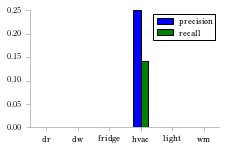

In [23]:
latexify()
pd.DataFrame(out).T.plot(kind="bar",rot=0)
format_axes(plt.gca())
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/outlier_p_r.pdf",bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/outlier_p_r.png",bbox_inches="tight")

In [48]:
map(len, all_homes.values())

[33, 14, 17, 21, 26, 32]

In [49]:
for appliance, h in all_homes.iteritems():
    print appliance, len(h)

hvac 33
light 14
wm 17
fridge 21
dw 26
dr 32
